# Visualizing the differences between the subdatasets for the machine learning model
Created 2025-01-22


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.axes._axes import Axes as matplotlib_Axis
from pathlib import Path
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import sklearn
import pickle
import re
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, auc

In [2]:
AF_prediction_path = Path("../ressources/AF_predictions").resolve()
AF_prediction_results = Path("../ressources/AF_predictions/AF_prediction_randomized_DMI_results.xlsx").resolve()
AF_prediction_metrics = Path("../ressources/AF_predictions/AF_metrics_all_structures.tsv").resolve()
AF_DMI_structures_folders = [Path("../ressources/AF_DMI_structures").resolve() / p for p in ['AF_DMI_structures1', 'AF_DMI_structures2', 'AF_DMI_structures3', "AF_DMI_mutated_structures"]]
AF_DDI_structures_path = Path("../ressources/AF_DDI_structures").resolve()
solved_DMI_structures_path = Path("../ressources/DMI_solved_structures_hydrogens").resolve()
solved_DDI_structures_path = Path("../ressources/DDI_solved_structures_hydrogens").resolve()

for p in [AF_prediction_results, AF_prediction_metrics, AF_DDI_structures_path, solved_DMI_structures_path, solved_DDI_structures_path] + AF_DMI_structures_folders:
    if not p.exists():
        print(f"{p} does not point to a valid path")

In [3]:
dataAF = pd.read_csv(AF_prediction_path / "data_af.csv")
dataAF.index = dataAF["prediction_name"] + "_" + dataAF["model_id"]
dataAF["min_distance"] = dataAF["min_distance"].fillna(value=20)
print(dataAF.columns)
dataAF

Index(['project_name', 'prediction_name', 'run_id', 'chainA_length',
       'chainB_length', 'model_id', 'model_confidence',
       'chainA_intf_avg_plddt', 'chainB_intf_avg_plddt', 'intf_avg_plddt',
       'pDockQ', 'iPAE', 'num_chainA_intf_res', 'num_chainB_intf_res',
       'num_res_res_contact', 'num_atom_atom_contact', 'RMSD_domain',
       'num_align_atoms_domain', 'align_score_domain', 'num_align_resi_domain',
       'RMSD_backbone_peptide', 'RMSD_all_atom_peptide', 'known_motif_plddt',
       'DockQ', 'iRMS', 'LRMS', 'Fnonnat', 'num_mutation_in_motif', 'label',
       'structure_name', 'file', 'hbonds', 'salt_bridges', 'buried_area',
       'min_distance', 'hydrophobic_interactions'],
      dtype='object')


,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,Fnonnat,num_mutation_in_motif,label,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
DEG_APCC_KENBOX_2_4GGD_ranked_0,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_0,0.887117,96.107999,77.495999,91.454999,...,0.087,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0
DEG_APCC_KENBOX_2_4GGD_ranked_1,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_1,0.871984,95.793846,73.986000,89.736111,...,0.050,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0
DEG_APCC_KENBOX_2_4GGD_ranked_2,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_2,0.760784,95.547501,57.906001,86.585239,...,0.185,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3
DEG_APCC_KENBOX_2_4GGD_ranked_3,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_3,0.413662,94.646667,21.510000,76.362500,...,0.364,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0
DEG_APCC_KENBOX_2_4GGD_ranked_4,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_4,0.359078,94.830001,19.753333,72.307001,...,0.889,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_0,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_0,0.298701,49.827778,73.161904,62.392307,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0.pdb,7,3,1617.382,5.591,56
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_1,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_1,0.246961,54.362000,76.415000,66.390909,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1.pdb,3,0,791.256,6.373,7
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_2,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_2,0.211579,52.651538,72.910908,61.937083,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2.pdb,2,1,882.547,7.906,11
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_3,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_3,0.211144,50.398334,78.798751,66.627144,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3.pdb,7,5,1020.896,4.628,44


In [4]:
X_columns = ["model_confidence", "chainA_intf_avg_plddt", "chainB_intf_avg_plddt", "intf_avg_plddt", "pDockQ", "iPAE", 
            "buried_area", "min_distance", "hbonds", "salt_bridges", "hydrophobic_interactions",
            "num_chainA_intf_res", "num_chainB_intf_res", "num_res_res_contact", "num_atom_atom_contact", "chainA_length", "chainB_length"]
dataAF_randomDMI = dataAF[np.logical_or(dataAF["num_mutation_in_motif"] == "known minimal", dataAF["num_mutation_in_motif"] == "random minimal")]
dataAF_mutated1DMI = dataAF[np.logical_or(dataAF["num_mutation_in_motif"] == "known minimal", dataAF["num_mutation_in_motif"] == "1")]
dataAF_mutated2DMI = dataAF[np.logical_or(dataAF["num_mutation_in_motif"] == "known minimal", dataAF["num_mutation_in_motif"] == "2")]
dataAF_randomDDI = dataAF[np.logical_or(dataAF["num_mutation_in_motif"] == "approved minimal DDI", dataAF["num_mutation_in_motif"] == "random minimal DDI")]

print(dataAF_randomDMI.shape, dataAF_mutated1DMI.shape, dataAF_mutated2DMI.shape, dataAF_randomDDI.shape)


randomDMI_xy = train_test_split(dataAF_randomDMI[X_columns], dataAF_randomDMI["label"], test_size=0.2, random_state=2501)
mutated1DMI_xy = train_test_split(dataAF_mutated1DMI[X_columns], dataAF_mutated1DMI["label"], test_size=0.2, random_state=2501)
mutated2DMI_xy = train_test_split(dataAF_mutated2DMI[X_columns], dataAF_mutated2DMI["label"], test_size=0.2, random_state=2501)
randomDDI_xy = train_test_split(dataAF_randomDDI[X_columns], dataAF_randomDDI["label"], test_size=0.2, random_state=2501)

print("Random DMI: Train", randomDMI_xy[0].shape, "Test", randomDMI_xy[1].shape)
print("1 Mutation DMI: Train", mutated1DMI_xy[0].shape, "Test", mutated1DMI_xy[1].shape)
print("2 Mutation DMI: Train", mutated2DMI_xy[0].shape, "Test", mutated2DMI_xy[1].shape)
print("Random DDI: Train", randomDDI_xy[0].shape, "Test", randomDDI_xy[1].shape)


(1332, 36) (1332, 36) (1332, 36) (453, 36)
Random DMI: Train (1065, 17) Test (267, 17)
1 Mutation DMI: Train (1065, 17) Test (267, 17)
2 Mutation DMI: Train (1065, 17) Test (267, 17)
Random DDI: Train (362, 17) Test (91, 17)


In [6]:
#rf_param_grid_randomDMI = {
#    "criterion": ["gini", "entropy", "log_loss"],
#    "n_estimators": [150, 200, 250, 300],
#    "min_samples_split": [6, 8, 10], 
#    "min_samples_leaf": [4],
#    "max_features": [6]
#}
rf_param_grid_randomDMI = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [150, 200, 250],
    "max_depth": [4,6,8,10,12],
    "min_samples_leaf": [1,2,3,4,5,10],
    "max_features": [4,5,6]
}

rf_randomDMI = RandomForestClassifier(random_state=2501)
random_search_randomDMI = RandomizedSearchCV(n_iter=10, estimator=rf_randomDMI, param_distributions=rf_param_grid_randomDMI, scoring='accuracy', n_jobs=-1, verbose=2, random_state=2501)
random_search_randomDMI.fit(randomDMI_xy[0], randomDMI_xy[2])
rf_best_randomDMI = random_search_randomDMI.best_estimator_
print("Score", accuracy_score(randomDMI_xy[3], rf_best_randomDMI.predict(randomDMI_xy[1])))
print("ROC auc score:", roc_auc_score(randomDMI_xy[3], rf_best_randomDMI.predict_proba(randomDMI_xy[1])[:,1]))
rf_best_randomDMI

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score 0.8539325842696629
ROC auc score: 0.9372262773722627


RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=6,
                       n_estimators=250, random_state=2501)

In [7]:
rf_param_grid_randomDDI = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [150, 200, 250],
    "max_depth": [4,6,8,10,12],
    "min_samples_leaf": [1,2,3,4,5,10],
    "max_features": [4,5,6]
}

rf_randomDDI = RandomForestClassifier(random_state=2501)
random_search_randomDDI = RandomizedSearchCV(n_iter=10, estimator=rf_randomDDI, param_distributions=rf_param_grid_randomDDI, scoring='accuracy', n_jobs=-1, verbose=2, random_state=2501)
random_search_randomDDI.fit(randomDDI_xy[0], randomDDI_xy[2])
rf_best_randomDDI = random_search_randomDDI.best_estimator_
print("Score", accuracy_score(randomDDI_xy[3], rf_best_randomDDI.predict(randomDDI_xy[1])))
print("ROC auc score:", roc_auc_score(randomDDI_xy[3], rf_best_randomDDI.predict_proba(randomDDI_xy[1])[:,1]))
rf_best_randomDDI

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score 0.7802197802197802
ROC auc score: 0.9144100580270793


RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=6,
                       n_estimators=250, random_state=2501)

In [8]:
rf_param_grid_mutated1DMI = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [150, 200, 250],
    "max_depth": [4,6,8,10,12],
    "min_samples_leaf": [1,2,3,4,5,10],
    "max_features": [4,5,6]
}

rf_mutated1DMI = RandomForestClassifier(random_state=2501)
random_search_mutated1DMI = RandomizedSearchCV(n_iter=10, estimator=rf_mutated1DMI, param_distributions=rf_param_grid_mutated1DMI, scoring='accuracy', n_jobs=-1, verbose=2, random_state=2501)
random_search_mutated1DMI.fit(mutated1DMI_xy[0], mutated1DMI_xy[2])
rf_best_mutated1DMI = random_search_mutated1DMI.best_estimator_
print("Score", accuracy_score(mutated1DMI_xy[3], rf_best_mutated1DMI.predict(mutated1DMI_xy[1])))
print("ROC auc score:", roc_auc_score(mutated1DMI_xy[3], rf_best_mutated1DMI.predict_proba(mutated1DMI_xy[1])[:,1]))
rf_best_mutated1DMI

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score 0.7340823970037453
ROC auc score: 0.857158899494666


RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=6,
                       n_estimators=250, random_state=2501)

In [10]:
rf_param_grid_mutated2DMI = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [150, 200, 250],
    "max_depth": [4,6,8,10,12],
    "min_samples_leaf": [1,2,3,4,5,10],
    "max_features": [4,5,6]
}

rf_mutated2DMI = RandomForestClassifier(random_state=2501)
random_search_mutated2DMI = RandomizedSearchCV(n_iter=10, estimator=rf_mutated2DMI, param_distributions=rf_param_grid_mutated2DMI, scoring='accuracy', n_jobs=-1, verbose=2, random_state=2501)
random_search_mutated2DMI.fit(mutated2DMI_xy[0], mutated2DMI_xy[2])
rf_best_mutated2DMI = random_search_mutated2DMI.best_estimator_
print("Score", accuracy_score(mutated2DMI_xy[3], rf_best_mutated2DMI.predict(mutated2DMI_xy[1])))
print("ROC auc score:", roc_auc_score(mutated2DMI_xy[3], rf_best_mutated2DMI.predict_proba(mutated2DMI_xy[1])[:,1]))
rf_best_mutated2DMI

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Score 0.8052434456928839
ROC auc score: 0.8918585064570467


RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=6,
                       n_estimators=250, random_state=2501)

In [11]:
result_array = [
   ("random DMI", rf_best_randomDMI, randomDMI_xy),
   ("1 mutation DMI", rf_best_mutated1DMI, mutated1DMI_xy),
   ("2 mutation DMI", rf_best_mutated2DMI, mutated2DMI_xy),
   ("random DDI", rf_best_randomDDI, randomDDI_xy)
]

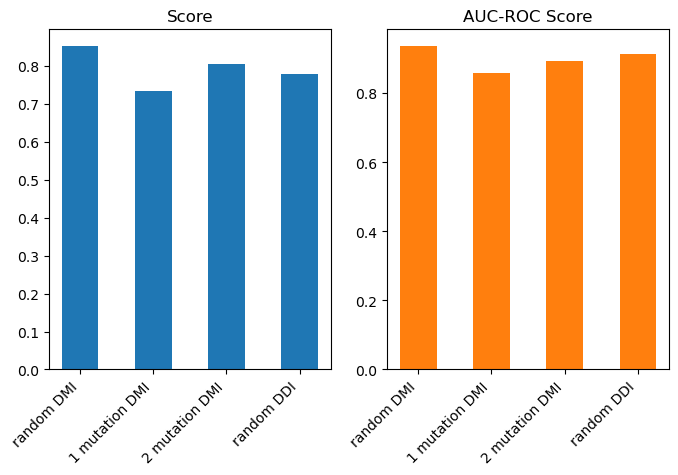

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8,5))
barlabels = [x[0] for x in result_array]
scores = [accuracy_score(x[2][3], x[1].predict(x[2][1])) for x in result_array]
rocscore = [roc_auc_score(x[2][3], x[1].predict_proba(x[2][1])[:, 1]) for x in result_array]
_barScore = axes[0].bar(barlabels, scores, width=0.5)
_barROC = axes[1].bar(barlabels, rocscore, color="tab:orange", width=0.5)
axes[0].set_title("Score")
axes[1].set_title("AUC-ROC Score")
fig.autofmt_xdate(rotation=45)
plt.show()

In [148]:
rf_best_randomDMI.predict_proba(randomDMI_xy[1])[:, 1]

array([1.        , 0.05564887, 0.12018131, 0.31680783, 0.2006117 ,
       0.2246743 , 0.5300151 , 0.49445696, 0.996     , 0.996     ,
       0.52993442, 0.20721247, 0.55707348, 0.18615667, 0.64037235,
       0.884     , 0.996     , 0.15612614, 0.11542966, 0.10041108,
       0.98      , 0.53261246, 0.988     , 0.17433668, 1.        ,
       0.2230689 , 0.42025347, 0.14588571, 0.24301746, 0.12280232,
       0.13005792, 0.992     , 0.20456174, 0.17760832, 0.24610949,
       0.14874087, 1.        , 0.17349352, 0.23453621, 0.996     ,
       0.19763552, 0.56381031, 0.984     , 0.5454285 , 0.51718175,
       0.1045536 , 0.18865088, 1.        , 0.30047132, 0.08356748,
       0.21268686, 0.23779643, 0.08343559, 0.32802078, 0.23136828,
       0.08675041, 0.48807708, 1.        , 0.45342083, 0.60096572,
       0.74816947, 0.93611497, 0.1369334 , 0.14721415, 0.8473539 ,
       0.0602244 , 0.19274759, 0.113194  , 0.2119995 , 0.996     ,
       0.976     , 0.56055129, 0.17706527, 0.0841257 , 0.07405

In [15]:
randomDMI_xy[3]

TRG_PTS1_2C0L_ranked_3                                    1
MDOC_GSK3_AXIN_1_1O9U.DDEG_SPOP_SBC_1_3HQM_ranked_1       0
MLIG_CSL_BTD_1_4J2X.DTRG_NES_CRM1_1_3GB8_ranked_4         0
MLIG_PALB2_WD40_1_3EU7.DLIG_ACTIN_RPEL_3_2V52_ranked_0    0
MDOC_MAPK_DCC_7_2B9J.DLIG_ANK_PXLPXL_1_3UXG_ranked_4      0
                                                         ..
DEG_SPOP_SBC_1_3HQM_ranked_0                              1
MLIG_SH3_3_2GBQ.DLIG_IBAR_NPY_1_2YKT_ranked_4             0
LIG_PCNA_TLS_4_2ZVL_ranked_4                              1
LIG_EF_ALG2_ABM_1_2ZNE_ranked_3                           1
LIG_WW_1_1EG4_ranked_1                                    1
Name: label, Length: 267, dtype: int64

In [16]:
accuracy_score(randomDMI_xy[3], rf_best_randomDMI.predict(randomDMI_xy[1]))

0.8539325842696629

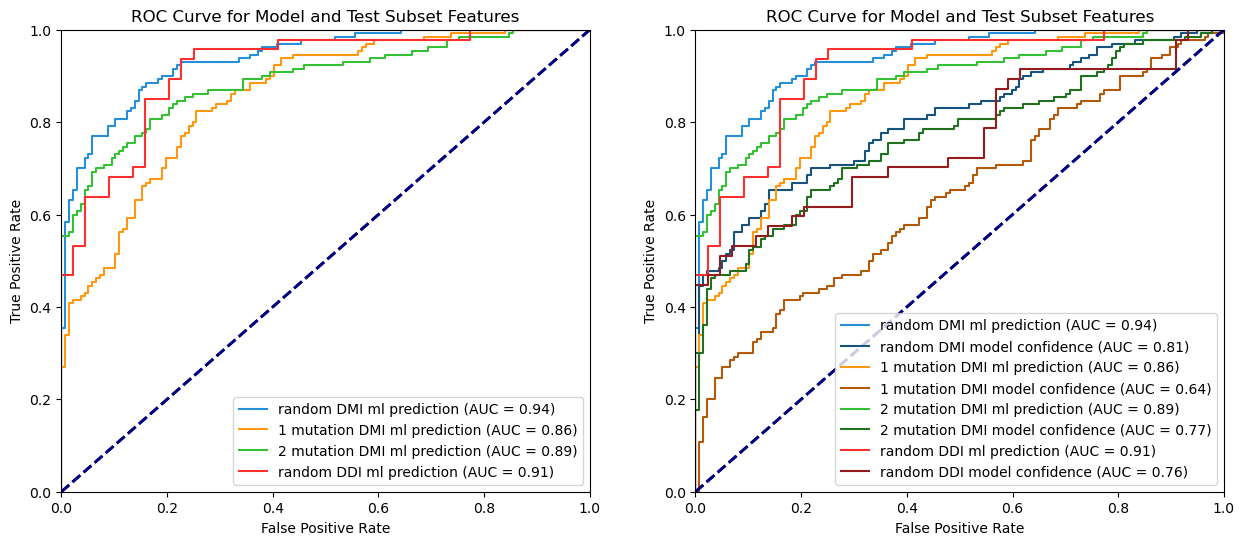

In [17]:
# Roc Curve
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax1, ax2 = axes
for name, model, xy in result_array:
   y_preda = model.predict_proba(xy[1])
    
   roc_conf_X, roc_conf_Y, _ = roc_curve(xy[3], xy[1]["model_confidence"])
   roc_conf = auc(roc_conf_X, roc_conf_Y)
   roc_model_X, roc_model_Y, _ = roc_curve(xy[3], y_preda[:, 1])
   roc_model = auc(roc_model_X, roc_model_Y)

   _line2D = ax1.plot(roc_model_X, roc_model_Y, label=f"{name} ml prediction (AUC = {roc_model:.2f})")[0]
   c = np.array(colors.to_rgb(_line2D.get_color()))
   c1 = np.clip(1.2*c, a_max=1, a_min=None)
   c2 = 0.7*c
   _line2D.set_color(c1)
   ax2.plot(roc_model_X, roc_model_Y, label=f"{name} ml prediction (AUC = {roc_model:.2f})", color=c1)
   
   ax2.plot(roc_conf_X, roc_conf_Y, label=f"{name} model confidence (AUC = {roc_conf:.2f})", color=c2)
for ax in [ax1, ax2]:   
   ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
   ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
   ax.set_xlim([0,1])
   ax.set_ylim([0,1])
   ax.set_xlabel('False Positive Rate')
   ax.set_ylabel('True Positive Rate')
   ax.set_title("ROC Curve for Model and Test Subset Features")
   ax.legend(loc="lower right")
plt.show()

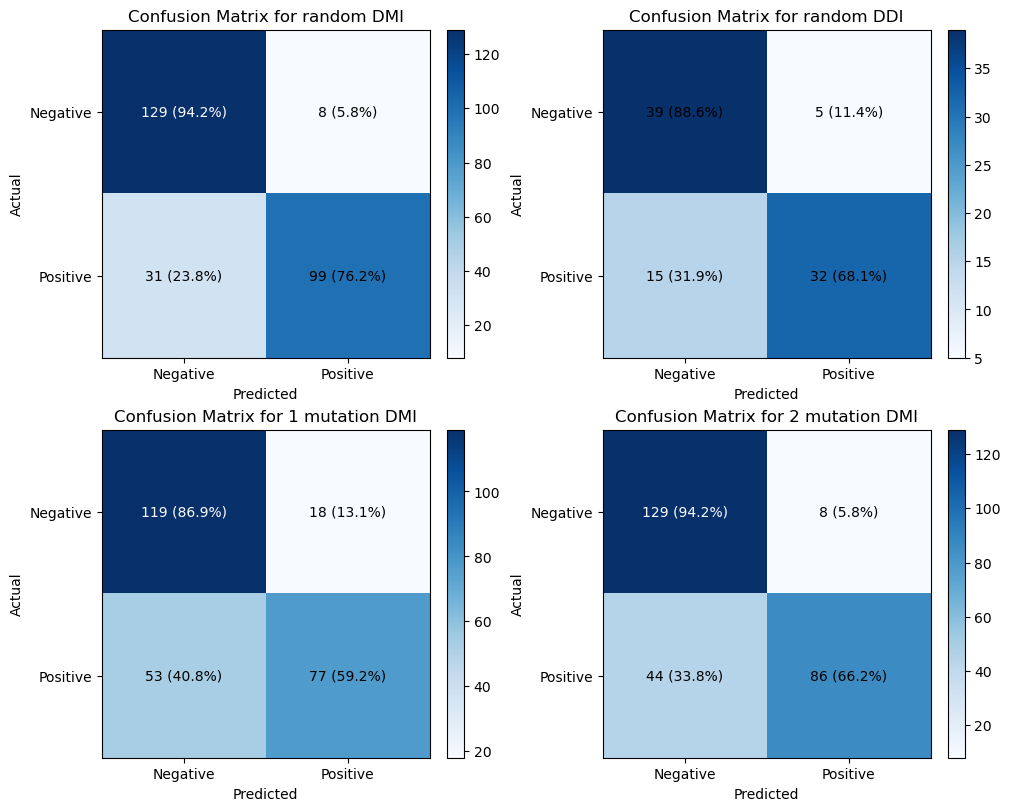

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10,8), constrained_layout=True)
axes = axes.flatten()
for i, (name, model, xy) in enumerate(result_array[0:1] + result_array[3:4] + result_array[1:3]): # Rearrange order
    y_pred = model.predict(xy[1])
    ax: matplotlib_Axis = axes[i]
    ax.set_title(f"Confusion Matrix for {name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    cm = confusion_matrix(xy[3], y_pred)
    imshow_cm = ax.imshow(cm, cmap="Blues")
    fig.colorbar(imshow_cm, ax=ax)
    ax.set_xticks(range(cm.shape[0]), labels=["Negative", "Positive"])
    ax.set_yticks(range(cm.shape[1]), labels=["Negative", "Positive"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            c = "black" if colors.rgb_to_hsv(imshow_cm.cmap(cm[i,j])[:3])[1] < 0.4 else "white"
            text = f"{cm[i,j]} ({round(100*(cm[i,j]/sum(cm[i])), 1)}%)"
            ax.text(j, i, text, ha="center", va="center", color=c)
plt.show()

In [14]:
dataAF

,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,Fnonnat,num_mutation_in_motif,label,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
DEG_APCC_KENBOX_2_4GGD_ranked_0,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_0,0.887117,96.107999,77.495999,91.454999,...,0.087,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0
DEG_APCC_KENBOX_2_4GGD_ranked_1,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_1,0.871984,95.793846,73.986000,89.736111,...,0.050,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0
DEG_APCC_KENBOX_2_4GGD_ranked_2,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_2,0.760784,95.547501,57.906001,86.585239,...,0.185,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3
DEG_APCC_KENBOX_2_4GGD_ranked_3,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_3,0.413662,94.646667,21.510000,76.362500,...,0.364,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0
DEG_APCC_KENBOX_2_4GGD_ranked_4,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_4,0.359078,94.830001,19.753333,72.307001,...,0.889,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_0,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_0,0.298701,49.827778,73.161904,62.392307,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0.pdb,7,3,1617.382,5.591,56
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_1,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_1,0.246961,54.362000,76.415000,66.390909,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1.pdb,3,0,791.256,6.373,7
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_2,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_2,0.211579,52.651538,72.910908,61.937083,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2.pdb,2,1,882.547,7.906,11
D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74_ranked_3,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_3,0.211144,50.398334,78.798751,66.627144,...,NaN,random minimal DDI,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3.pdb,7,5,1020.896,4.628,44


In [39]:
set(dataAF["num_mutation_in_motif"])

{'1',
 '2',
 'approved minimal DDI',
 'known minimal',
 'random minimal',
 'random minimal DDI'}

In [74]:
rmsd = dataAF_randomDMI["RMSD_all_atom_peptide"]
proba = rf_best_randomDMI.predict_proba(dataAF_randomDMI[X_columns])[:,1]

In [65]:
set(data_np["label"])

{0, 1}

In [73]:
dataAF_randomDMI

,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,Fnonnat,num_mutation_in_motif,label,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
DEG_APCC_KENBOX_2_4GGD_ranked_0,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_0,0.887117,96.107999,77.495999,91.454999,...,0.087,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0
DEG_APCC_KENBOX_2_4GGD_ranked_1,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_1,0.871984,95.793846,73.986000,89.736111,...,0.050,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0
DEG_APCC_KENBOX_2_4GGD_ranked_2,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_2,0.760784,95.547501,57.906001,86.585239,...,0.185,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3
DEG_APCC_KENBOX_2_4GGD_ranked_3,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_3,0.413662,94.646667,21.510000,76.362500,...,0.364,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0
DEG_APCC_KENBOX_2_4GGD_ranked_4,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_4,0.359078,94.830001,19.753333,72.307001,...,0.889,known minimal,1,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_0,AlphaFold_benchmark,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,run38,312,4,ranked_0,0.680386,94.414615,40.943334,84.388750,...,NaN,random minimal,0,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_0.pdb,0,0,585.345,6.220,25
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_1,AlphaFold_benchmark,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,run38,312,4,ranked_1,0.674241,89.304167,38.329999,79.109334,...,NaN,random minimal,0,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_1.pdb,1,2,567.373,5.664,23
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_2,AlphaFold_benchmark,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,run38,312,4,ranked_2,0.670584,90.133333,37.503333,76.975833,...,NaN,random minimal,0,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_2.pdb,3,2,589.111,5.396,12
MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3_ranked_3,AlphaFold_benchmark,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,run38,312,4,ranked_3,0.635099,87.795000,36.423333,77.520667,...,NaN,random minimal,0,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_3.pdb,4,2,584.961,6.929,9


In [35]:
print(roc_auc_score(randomDMI_xy[2], rf_best_randomDMI.predict_proba(randomDMI_xy[0])[:,1]))
print(roc_auc_score(randomDMI_xy[3], rf_best_randomDMI.predict_proba(randomDMI_xy[1])[:,1]))

0.9989913808912526
0.9250982594048287


In [76]:
roc_auc_score(dataAF_randomDMI["label"], proba)

0.9952766379582451

In [71]:
roc_auc_score(data_n["label"], rf_best_randomDMI.predict_proba(data_n[X_columns])[:,1])

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

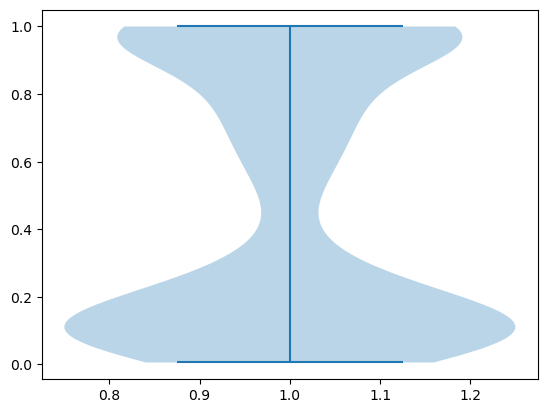

In [75]:
plt.violinplot(proba)
plt.show()

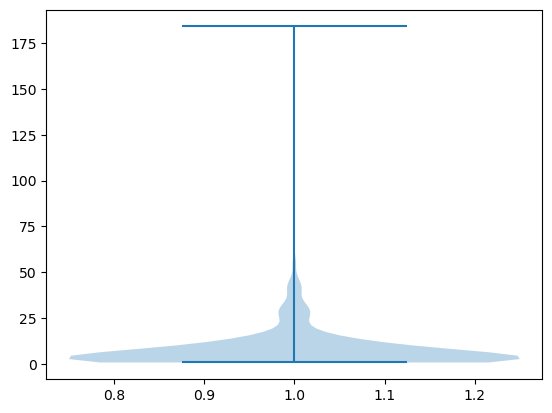

In [34]:
plt.violinplot(rmsd)
plt.show()

In [24]:
display(randomDMI_xy[1])

_merge = pd.merge(
    left=randomDMI_xy[1],
    right=dataAF,
    how = "inner",
    sort=False,
    left_index=True,
    right_index=True,
    suffixes=("_","")
)
_merge = _merge[~np.isnan(_merge["RMSD_all_atom_peptide"])]
rmsd = _merge["RMSD_all_atom_peptide"]
proba = rf_best_randomDMI.predict_proba(_merge[X_columns])
y_pred = rf_best_randomDMI.predict(_merge[X_columns])

,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,pDockQ,iPAE,buried_area,min_distance,hbonds,salt_bridges,hydrophobic_interactions,num_chainA_intf_res,num_chainB_intf_res,num_res_res_contact,num_atom_atom_contact,chainA_length,chainB_length
TRG_PTS1_2C0L_ranked_3,0.946311,97.610834,94.082499,97.106786,0.284464,1.477955,894.777,4.529,11,3,30,24,4,35,289,305,4
MDOC_GSK3_AXIN_1_1O9U.DDEG_SPOP_SBC_1_3HQM_ranked_1,0.311224,94.949166,41.337500,73.504500,0.036892,19.427460,766.752,6.497,4,4,10,12,8,18,106,137,17
MLIG_CSL_BTD_1_4J2X.DTRG_NES_CRM1_1_3GB8_ranked_4,0.479316,95.180000,33.522500,77.563571,0.034578,8.436371,726.252,7.691,0,0,27,10,4,14,90,179,4
MLIG_PALB2_WD40_1_3EU7.DLIG_ACTIN_RPEL_3_2V52_ranked_0,0.770305,91.480000,58.658572,81.490870,0.075845,4.711344,968.439,5.507,4,0,32,16,7,24,208,373,9
MDOC_MAPK_DCC_7_2B9J.DLIG_ANK_PXLPXL_1_3UXG_ranked_4,0.462794,92.038076,32.913333,76.834571,0.163179,10.017007,1257.832,5.448,4,0,74,26,9,39,381,163,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEG_SPOP_SBC_1_3HQM_ranked_0,0.936712,98.691538,95.980000,97.938333,0.226315,1.399178,684.663,4.680,5,0,29,13,5,24,223,137,5
MLIG_SH3_3_2GBQ.DLIG_IBAR_NPY_1_2YKT_ranked_4,0.354908,90.778333,26.740000,69.432222,0.041370,15.674540,398.556,5.563,0,0,4,6,3,8,44,221,7
LIG_PCNA_TLS_4_2ZVL_ranked_4,0.843673,88.630555,75.785715,85.034000,0.173617,3.771756,1043.416,4.656,2,0,102,18,7,35,271,255,8
LIG_EF_ALG2_ABM_1_2ZNE_ranked_3,0.559712,90.636111,40.376250,75.171539,0.113341,8.424296,1259.144,3.902,3,0,11,18,8,33,364,168,9


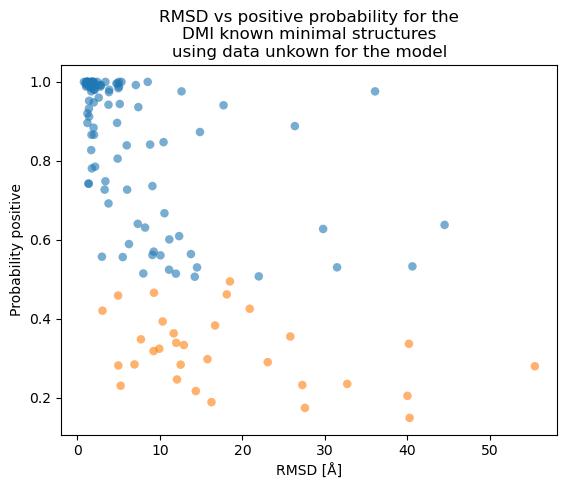

In [61]:
color_list = plt.rcParams['axes.prop_cycle'].by_key()["color"]
_colors = y_pred.copy()
#c1 = list(colors.hex2color(color_list[0]))
#c1.append(0.3)
#c2 = list(colors.hex2color(color_list[1]))
#c2.append(0.3)
#_colors[_colors == 0] = 0
#_colors[_colors == 1] = 2
_plt = plt.scatter(rmsd, proba[:,1], c=_colors, linewidths=0.1, edgecolors=None, alpha=0.6, cmap=colors.ListedColormap([color_list[1], color_list[0]]))
_#nc = _plt.get_facecolor()[0]
#_nc[3] = 0.3
#_plt.set_facecolor(_nc)
plt.title("RMSD vs positive probability for the\nDMI known minimal structures\nusing data unkown for the model")
plt.xlabel("RMSD [Å]")
plt.ylabel("Probability positive")
plt.show()

In [32]:
prop_cycle = plt.rcParams['axes.prop_cycle']
prop_cycle.by_key()["color"][0]

'#1f77b4'